## Import dependencies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time

## Import datafiles

In [15]:
wild_data = pd.read_csv('herbivores.csv')
poacher = pd.read_csv('poacher.csv')

## Plot animals on map

<IPython.core.display.Javascript object>


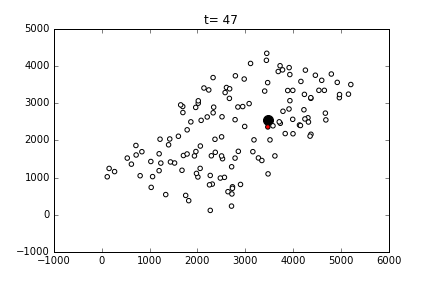

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [ ]:
%matplotlib notebook
def plot_clusters(ax,animal_xy,poacher,clusters,t,p=True):
    
    # melt the dataframe to long-form instead of wide-form
    melt_df = pd.melt(animal_xy[animal_xy['t']==t])
    
    #initialize an empty df to store only the features we want to use for our kmeans clusters
    train_features = pd.DataFrame()
    train_features['x'] = melt_df[melt_df['variable'].str.contains('_x')].reset_index()['value']
    train_features['y'] = melt_df[melt_df['variable'].str.contains('_y')].reset_index()['value']
    train_features['dist_sq'] = np.square(melt_df[melt_df['variable'].str.contains('_dist')].reset_index()['value'])
    
    #kmeans clusters on distance squared
    model = KMeans(n_clusters=clusters)
    model.fit(train_features['dist_sq'].reshape(-1, 1))
    train_features['cluster'] = model.labels_
    
    # let i point to the index of the cluster with the highest values for distance squared
    i = train_features.groupby('cluster').min()['dist_sq'].argmax()
    
    #coordinates for our poacher
    x_poach = poacher[poacher['t'] == t]['x']
    y_poach = poacher[poacher['t'] == t]['y']

    # if p = True, show poachers location in animation
    if p:  ax.scatter(x_poach,y_poach,color='black', marker='o',s=100)
        
    dist_from_cluster = np.abs(train_features[train_features['cluster'] == i]['dist_sq'] 
                               - int(model.cluster_centers_[i]))
    
    # initialize a colormap where we only color animals belonging to cluster i, 
    # so we can distinct our running animals from idle ones
    c_map = {i:'w' for i in range(clusters)}
    if np.std(dist_from_cluster) > 2:
        c_map[i] = 'w'
    else: c_map[i] = 'r'

    
    # plot our wildlife park
    ax.scatter(list(train_features['x']),list(train_features['y']),
               c=[c_map[_] for _ in train_features['cluster']])
    plt.title('t= ' + str(t))
    fig.canvas.draw()
    ax.clear()
    
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')

for t in range(1,300):
    plot_clusters(ax,wild_data,poacher,10,t,p=True)
    time.sleep(0.001)